![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [1]:
import numpy as np
import pandas as pd

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [3]:
# import os
# os.getcwd()

In [9]:
df_beer = pd.read_csv('data/datasets_beers.csv') # index_col=0
df_beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [11]:
df_beer.drop(columns=['Unnamed: 0'], inplace=True)
df_beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [15]:
df_beer.shape

(2410, 7)

In [17]:
print("El número de filas es", df_beer.shape[0])
print("El número de columnas es", df_beer.shape[1])

El número de filas es 2410
El número de columnas es 7


In [18]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [19]:
df_beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [21]:
len(df_beer.columns)

7

In [26]:
# len(df_beer.index)
len(df_beer)

2410

## Ejercicio 5
¿De qué tipo son los datos?

In [27]:
df_beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [29]:
df_describe = df_beer[['abv','ibu','ounces']].describe()
df_describe

,abv,ibu,ounces
count,2348.000000,1405.000000,2410.000000
mean,0.059773,42.713167,13.592241
std,0.013542,25.954066,2.352204
min,0.001000,4.000000,8.400000
25%,0.050000,21.000000,12.000000
50%,0.056000,35.000000,12.000000
75%,0.067000,64.000000,16.000000
max,0.128000,138.000000,32.000000


In [30]:
df_describe = df_beer[['abv','ibu','ounces']].agg(['mean','count'])
df_describe

,abv,ibu,ounces
mean,0.059773,42.713167,13.592241
count,2348.000000,1405.000000,2410.000000


In [32]:
df_describe = df_beer.agg({ "abv": ['mean','count'],
                            "ibu": ['mean', 'count', 'max'],
                            "ounces": ['mean', 'count', 'max', 'min']
                            })
df_describe

,abv,ibu,ounces
mean,0.059773,42.713167,13.592241
count,2348.000000,1405.000000,2410.000000
max,NaN,138.000000,32.000000
min,NaN,NaN,8.400000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [41]:
len(df_beer['style'].unique())

100

In [37]:
df_beer['style'].nunique()

99

In [47]:
df_beer['style'].value_counts()[0:10]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Name: style, dtype: int64

In [50]:
df_beer.groupby('style')[['name']].count().sort_values('name', ascending=False)

,name
style,
American IPA,424
American Pale Ale (APA),245
American Amber / Red Ale,133
American Blonde Ale,108
American Double / Imperial IPA,105
...,...
Smoked Beer,1
Flanders Red Ale,1
Kristalweizen,1


In [52]:
df_beer[df_beer['style'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces
566,NaN,NaN,2210,Special Release,NaN,29,16.0
853,0.060,21.0,1635,Kilt Lifter Scottish-Style Ale,NaN,160,12.0
866,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0
1554,NaN,NaN,1796,The CROWLER™,NaN,166,32.0
1555,NaN,NaN,1790,CAN'D AID Foundation,NaN,166,12.0


## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [60]:
df_beer.head(10)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [57]:
df_beer.iloc[9:20,:]

,abv,ibu,id,name,style,brewery_id,ounces
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0


In [62]:
df_beer.loc[9:19,"name":] 

,name,style,brewery_id,ounces
9,Cone Crusher,American Double / Imperial IPA,177,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0


In [64]:
df_beer[['abv','ibu','ounces']].loc[9:19,:] 

,abv,ibu,ounces
9,0.086,NaN,12.0
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0


In [78]:
df_beer[['abv','ibu','ounces']].loc[9:19,:].values

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [79]:
df_beer[['abv','ibu','ounces']].loc[9:19,:].to_numpy()

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [74]:
np.array(df_beer[['abv','ibu','ounces']].loc[9:19,:])

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [81]:
df_beer['ounces'].sum()

32757.3

In [85]:
df_beer.groupby('style')[['ounces']].sum().sort_values('ounces', ascending=False).head(10)

,ounces
style,
American IPA,5758.4
American Pale Ale (APA),3233.6
American Amber / Red Ale,1768.0
American Double / Imperial IPA,1487.2
American Blonde Ale,1424.0
American Pale Wheat Ale,1300.0
American Brown Ale,938.4
American Porter,936.0
Saison / Farmhouse Ale,720.0


## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [90]:
round(df_beer['ibu'].mean(), 2)

42.71

In [91]:
print("Maximo", df_beer['ibu'].max())
print("Maximo", df_beer['ibu'].min())

Maximo 138.0
Maximo 4.0


In [92]:
df_beer[df_beer['ibu'] == df_beer['ibu'].max()]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [93]:
df_beer[df_beer['ibu'] == df_beer['ibu'].min()]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [94]:
df_beer['ibu'].var()

673.6135373259929

In [99]:
df_beer['ibu'].std()

25.954065911259317

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

In [102]:
df_beer[['abv','ibu','ounces']].corr()

,abv,ibu,ounces
abv,1.000000,0.670621,0.172529
ibu,0.670621,1.000000,0.054691
ounces,0.172529,0.054691,1.000000


<AxesSubplot:>

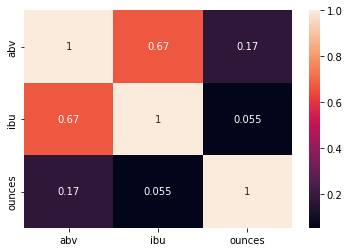

In [106]:
import seaborn as sns

sns.heatmap(df_beer[['abv','ibu','ounces']].corr(), annot=True)

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

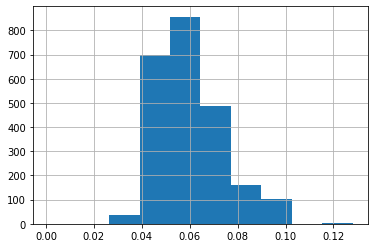

In [109]:
df_beer['abv'].hist();

In [112]:
from scipy import stats

stats.skew(df_beer['abv'][df_beer['abv'].notna()])

0.9578647103102429

In [113]:
df_beer['abv'][df_beer['abv'].isna()]

294    NaN
299    NaN
315    NaN
316    NaN
317    NaN
        ..
2186   NaN
2337   NaN
2345   NaN
2347   NaN
2349   NaN
Name: abv, Length: 62, dtype: float64

In [114]:
stats.skew(df_beer['abv'].fillna(df_beer['abv'].mean()))

0.9704287360715808

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


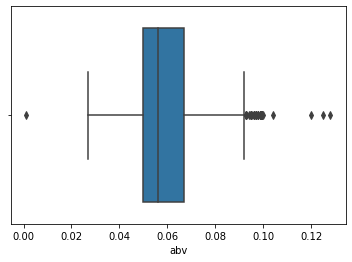

In [119]:
sns.boxplot(df_beer['abv']);

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [122]:
df_beer.groupby('style')[['abv']].mean().sort_values('abv', ascending=False).head(10)

,abv
style,
English Barleywine,0.107667
Quadrupel (Quad),0.104000
American Barleywine,0.099000
American Malt Liquor,0.099000
Russian Imperial Stout,0.097636
American Double / Imperial Stout,0.093667
American Double / Imperial IPA,0.087369
Tripel,0.086818
Baltic Porter,0.085167


In [125]:
df_beer.groupby('style')[['ibu']].mean().sort_values('ibu', ascending=False).head(10)

,ibu
style,
American Barleywine,96.000000
American Double / Imperial IPA,93.320000
Russian Imperial Stout,86.500000
American Double / Imperial Pilsner,85.000000
Belgian Strong Dark Ale,72.000000
American Black Ale,68.900000
American IPA,67.634551
English Barleywine,66.666667
English Stout,66.000000


## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [126]:
df_brew = pd.read_csv('data/datasets_breweries.csv')
df_brew.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [128]:
df_brew.rename(columns={"Unnamed: 0": "brewery_id", "name":"brewery_name"}, inplace=True)
df_brew

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [129]:
df_beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [130]:
df_brew.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [131]:
df = pd.merge(df_beer, df_brew)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [134]:
len(df['state'].unique())

51

In [135]:
df['state'].nunique()

51

In [136]:
df['city'].nunique()

384

In [139]:
df['brewery_id'].nunique()

558

In [138]:
df['brewery_name'].nunique()

551

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [140]:
df.groupby(['state', 'city'])['abv'].agg(['mean','median','max'])

mean  median    max
state city                               
 AK   Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
 AL   Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
 WI   Wilson      0.055000  0.0550  0.055
 WV   Lewisburg   0.062000  0.0620  0.067
 WY   Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [143]:
df.head()

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [149]:
df[df['state'] == "IN"]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state


In [152]:
df[df['state'].str.contains("IN")].sort_values('ibu', ascending=False).head(10)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
479,0.099,115.0,2471,Hopkick Dropkick,American Double / Imperial IPA,24,12.0,Burn 'Em Brewing,Michigan City,IN
2191,0.085,115.0,1449,Overlord Imperial IPA,American Double / Imperial IPA,17,16.0,Tin Man Brewing Company,Evansville,IN
811,0.060,104.0,1610,Half Cycle IPA,American IPA,16,16.0,Flat 12 Bierwerks,Indianapolis,IN
2062,0.091,91.0,651,Isis,American Double / Imperial IPA,25,16.0,Sun King Brewing Company,Indianapolis,IN
2189,0.120,90.0,2621,Csar,Russian Imperial Stout,17,16.0,Tin Man Brewing Company,Evansville,IN
850,0.064,90.0,2610,The Gadget,American IPA,22,16.0,Four Fathers Brewing,Valparaiso,IN
483,0.072,86.0,2158,3:33 Black IPA,American IPA,24,16.0,Burn 'Em Brewing,Michigan City,IN
1623,0.065,77.0,2175,Mound Builder IPA,American IPA,205,12.0,People's Brewing Company,Lafayette,IN
2047,0.075,77.0,1420,Grapefruit Jungle (GFJ),American IPA,25,16.0,Sun King Brewing Company,Indianapolis,IN
2064,0.075,77.0,532,Grapefruit Jungle (GFJ) (2011),American IPA,25,16.0,Sun King Brewing Company,Indianapolis,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [153]:
df['ibu'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [154]:
df.groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [157]:
df[df['brewery_name']=="18th Street Brewery"] # Ciudado! El 0.07 aplica a la cervecería, no a la cerveza

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
7,0.065,NaN,2259,Foreman,American Porter,177,12.0,18th Street Brewery,Gary,IN
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0,18th Street Brewery,Gary,IN


In [158]:
df[df['abv'] >= 0.07] # Caemos en un sesgo

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2380,0.080,31.0,761,P-51 Porter,American Porter,509,16.0,Wingman Brewers,Tacoma,WA
2382,0.071,60.0,2148,#002 American I.P.A.,American IPA,211,12.0,Wisconsin Brewing Company,Verona,WI
2398,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0,Worthy Brewing Company,Bend,OR
2402,0.082,NaN,1316,Colorojo Imperial Red Ale,American Strong Ale,424,12.0,Wynkoop Brewing Company,Denver,CO


In [168]:
df_brew_23 = df.groupby("brewery_id")[['abv']].max()
cond_breweries = df_brew_23[df_brew_23['abv'] >= 0.07].index
cond_breweries

Int64Index([  1,   2,   3,   5,   6,   7,   8,  10,  12,  15,
            ...
            507, 509, 514, 515, 521, 522, 523, 524, 530, 550],
           dtype='int64', name='brewery_id', length=227)

In [169]:
df[df['brewery_id'].isin(cond_breweries)]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [170]:
df['ibu'].mean()

42.71316725978647

In [175]:
df_24 = df.groupby('state')[['ibu']].mean()
df_24

,ibu
state,
AK,40.882353
AL,51.222222
AR,39.000000
AZ,35.208333
CA,46.281481
CO,47.431507
CT,40.833333
DC,55.250000
DE,52.000000


In [ ]:
states_cond = df_24[df_24['ibu'] >= df['ibu'].mean()].index
states_cond

In [174]:
df[df['state'].isin(states_cond)]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO
